In [38]:
import requests
from pprint import pprint

In [39]:
#replace with your own FACE API key
sub_key = "<YOUR SUBSCIPTION KEY>"
end_point = "<YOUR SUBSCIPTION ENDPOINT>"
assert sub_key

In [40]:
#replace with your own endpoint
base_url = end_point + "/face/v1.0"
face_api = base_url + "/detect"

pprint(face_api)

'https://diem-faceapi.cognitiveservices.azure.com/face/v1.0/detect'


 ## Select a face image

In [41]:
image_url = 'https://parissecret.com/wp-content/uploads/2020/04/Capture-d%E2%80%99e%CC%81cran-2020-04-09-a%CC%80-10.30.24.png'


## Build request parameter

In [42]:

headers = {"Ocp-Apim-Subscription-Key": sub_key}

params = {'returnFaceId': 'true',
         'returnFaceLandmarks': 'false',
         'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,makeup'}

data = {'url' : image_url}


## Send request with defined parameters

In [43]:
response = requests.post(face_api
                         , params = params
                         , headers = headers
                         ,json = data)

print(response)

<Response [200]>


## Analyse the data in response

In [44]:
'''
results is an array of json objects
'''
results = response.json()
pprint(results)
type(results)

[{'faceAttributes': {'age': 37.0,
                     'emotion': {'anger': 0.0,
                                 'contempt': 0.0,
                                 'disgust': 0.0,
                                 'fear': 0.0,
                                 'happiness': 0.0,
                                 'neutral': 0.999,
                                 'sadness': 0.0,
                                 'surprise': 0.0},
                     'facialHair': {'beard': 0.1,
                                    'moustache': 0.1,
                                    'sideburns': 0.1},
                     'gender': 'male',
                     'glasses': 'NoGlasses',
                     'headPose': {'pitch': -13.7, 'roll': -1.1, 'yaw': -11.5},
                     'makeup': {'eyeMakeup': False, 'lipMakeup': False},
                     'smile': 0.0},
  'faceId': '2703dcf7-a525-4095-b009-5535cf732597',
  'faceRectangle': {'height': 183, 'left': 330, 'top': 120, 'width': 183}}]


list

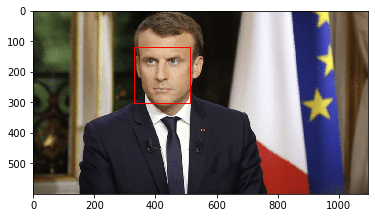

In [45]:
rec_points = results[0]['faceRectangle']

image = Image.open(BytesIO(requests.get(image_url).content))

pic = plt.imshow(image,)

rect = Rectangle((rec_points['left']
                  ,rec_points['top'])
                 ,rec_points['height']
                 ,rec_points['width']
                 ,linewidth=1
                 ,edgecolor='r'
                 ,facecolor='none')

pic.axes.add_patch(rect)
